## Summary

Create figures for different structure stability scores.

----

In [56]:
0.025 / (14 * 4)

0.00044642857142857147

## Imports

In [1]:
import io
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option("max_row", 1000)
pd.set_option("max_column", 1000)

## Parameters

In [3]:
NOTEBOOK_NAME = "16_david_analysis"
NOTEBOOK_PATH = Path(NOTEBOOK_NAME).resolve()
NOTEBOOK_PATH.mkdir(exist_ok=True)
NOTEBOOK_PATH

PosixPath('/home/kimlab1/strokach/workspace/proteinsolver/notebooks/16_david_analysis')

## Helper functions

In [4]:
def read_scores_total(file):
    columns = [
        "protein_name",
        "pdb_name",
        "molpdf",
        *[f"ga341_score_{i}" for i in range(8)],
        "dope_score",
        "dope_score_norm",
        "nope_hr_score",
    ]
    results = []
    with file.open("rt") as fin:
        for line in fin:
            protein_name, pdb_name, molpdf, ga341_score, dope_score, dope_score_norm, nope_hr_score = line.strip().split(
                ":"
            )
            results.append(
                (
                    protein_name,
                    pdb_name,
                    float(molpdf),
                    *eval(ga341_score),
                    float(dope_score),
                    float(dope_score_norm),
                    float(nope_hr_score),
                )
            )
    return pd.DataFrame(results, columns=columns)

In [5]:
def load_rosetta(file):
    header = "SCORE: total_score dslf_fa13    fa_atr    fa_dun   fa_elec fa_intra_rep fa_intra_sol_xover4              fa_rep              fa_sol hbond_bb_sc hbond_lr_bb    hbond_sc hbond_sr_bb lk_ball_wtd       omega     p_aa_pp pro_close rama_prepro         ref yhh_planarity description \n"
    buf = io.StringIO()
    buf.write(header)
    with file.open("rt") as fin:
        for line in fin:
            if line.startswith("SEQUENCE:") or line.startswith(header):
                continue
            buf.write(line)
    buf.seek(0)
    df = pd.read_csv(buf, sep=" +", engine="python",)
    return df

## Workflow

Note from David:

> The way to read the file (i.e., scoresTotal) is:
> 
> protein_name + ':' + pdb_name + ':' + molpdf + ':' + 'GA341 score' + ':' + 'DOPE score' + ':' + 'Normalized DOPE score' + ':' + 'DOPE-HR score + '\n'
> 
> The measure that we used in the plots was molpdf, then you should read the third column.

In [6]:
!ls {NOTEBOOK_PATH}

modeller-and-rosetta-score-distributions-1n5u.pdf
modeller-and-rosetta-score-distributions-1n5u.png
modeller-and-rosetta-score-distributions-1n5u.svg
modeller-and-rosetta-score-distributions-4beu.pdf
modeller-and-rosetta-score-distributions-4beu.png
modeller-and-rosetta-score-distributions-4beu.svg
modeller-and-rosetta-score-distributions-4unu.pdf
modeller-and-rosetta-score-distributions-4unu.png
modeller-and-rosetta-score-distributions-4unu.svg
modeller-and-rosetta-score-distributions-4z8j.pdf
modeller-and-rosetta-score-distributions-4z8j.png
modeller-and-rosetta-score-distributions-4z8j.svg
modeller-and-rosetta-score-distributions-5vid.pdf
modeller-and-rosetta-score-distributions-5vid.png
modeller-and-rosetta-score-distributions-5vid.svg
modeller-and-rosetta-score-distributions-5vli.pdf
modeller-and-rosetta-score-distributions-5vli.png
modeller-and-rosetta-score-distributions-5vli.svg
modeller-and-rosetta-score-distributions-5vmr.pdf
modeller-and-rosetta-score-distributions-5vmr.png


In [7]:
!ls {NOTEBOOK_PATH}/Scores

1n5u	4beu	4unu	      4unuWT  4z8jFiltered  5vid    5vli    5vmr
1n5uWT	4beuWT	4unuFiltered  4z8j    4z8jWT	    5vidWT  5vliWT  5vmrWT


### Load model scores

In [8]:
SCORES = {}

PDB_IDS = ["1n5u", "4beu", "4unu", "4z8j", "5vid", "5vli", "5vmr"]

In [9]:
for pdb_id in PDB_IDS:
    print(pdb_id)

    SCORES[f"{pdb_id}_modeller_wt"] = read_scores_total(
        NOTEBOOK_PATH.joinpath("Scores", f"{pdb_id}WT", "scoresTotal")
    )
    assert len(SCORES[f"{pdb_id}_modeller_wt"]) == 1

    SCORES[f"{pdb_id}_modeller"] = read_scores_total(
        NOTEBOOK_PATH.joinpath("Scores", f"{pdb_id}", "scoresTotal")
    )

    SCORES[f"{pdb_id}_rosetta_wt"] = load_rosetta(
        NOTEBOOK_PATH.joinpath("Scores", f"{pdb_id}WT", "scoresTotal_rosetta.sc"),
    )
    assert len(SCORES[f"{pdb_id}_rosetta_wt"]) == 1

    SCORES[f"{pdb_id}_rosetta"] = load_rosetta(
        NOTEBOOK_PATH.joinpath("Scores", f"{pdb_id}", "scoresTotal_rosetta.sc"),
    )

1n5u
4beu
4unu
4z8j
5vid
5vli
5vmr


In [10]:
SCORES[f"{pdb_id}_rosetta_wt"]

,SCORE:,total_score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,lk_ball_wtd,omega,p_aa_pp,pro_close,rama_prepro,ref,yhh_planarity,description
0,SCORE:,-90.798,-1.393,-201.482,47.2,-64.385,0.422,7.817,23.292,144.088,-6.16,-0.902,-5.112,-23.635,-4.487,1.405,-8.081,0.0,-8.308,8.923,0.0,5vmr_0001


In [11]:
pdb_id

'5vmr'

### Generate plots

In [12]:
SCORES["1n5u_modeller"].head()

,protein_name,pdb_name,molpdf,ga341_score_0,ga341_score_1,ga341_score_2,ga341_score_3,ga341_score_4,ga341_score_5,ga341_score_6,ga341_score_7,dope_score,dope_score_norm,nope_hr_score
0,1n5u_11115,1n5u_11115.B99990001.pdb,331.188141,1.0,0.333770,-199.935623,-11.192048,-14.278540,-6.215987,-6.553811,-9.149229,-8536.583984,-2.325544,-7893.746094
1,1n5u_10104,1n5u_10104.B99990001.pdb,291.176971,1.0,0.335036,-216.271133,-11.589787,-14.527915,-7.145832,-6.461433,-8.887251,-8651.523438,-2.291999,-8350.359375
2,1n5u_11709,1n5u_11709.B99990001.pdb,321.634644,1.0,0.343180,-220.915268,-11.113292,-14.798443,-7.288752,-6.346551,-9.109745,-8701.623047,-2.355440,-8406.374023
3,1n5u_11569,1n5u_11569.B99990001.pdb,358.094788,1.0,0.331383,-193.088791,-11.931268,-14.321241,-6.849178,-6.600010,-8.736956,-8500.715820,-2.295815,-7982.669434
4,1n5u_10496,1n5u_10496.B99990001.pdb,320.189484,1.0,0.344019,-200.976791,-11.313426,-14.269778,-6.716456,-6.372287,-8.620751,-8604.061523,-2.389728,-8127.271973


In [13]:
SCORES["1n5u_rosetta"].describe()

,total_score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,lk_ball_wtd,omega,p_aa_pp,pro_close,rama_prepro,ref,yhh_planarity
count,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000,16487.000000
mean,-227.796927,-3.253338,-515.209958,115.376251,-167.747010,0.920853,18.741575,58.585529,380.262940,-7.587940,-1.683784,-12.933979,-58.805364,-16.070841,3.702669,-12.222696,0.524877,-13.537225,3.070913,0.069587
std,6.927876,0.871608,8.385177,4.087143,6.924111,0.044577,1.104581,2.184559,7.287774,1.868239,0.836989,2.651065,1.318788,1.524308,1.072899,1.134971,0.238970,1.947257,3.149636,0.134742
min,-251.468000,-4.410000,-547.958000,100.699000,-197.329000,0.804000,15.070000,50.799000,353.131000,-18.687000,-4.753000,-25.329000,-64.671000,-22.138000,0.116000,-16.190000,0.032000,-19.415000,-9.323000,0.000000
25%,-232.574000,-3.918000,-520.985500,112.576500,-172.355000,0.890000,17.966500,57.092500,375.303000,-8.761500,-2.269000,-14.658500,-59.683000,-17.075000,2.957000,-12.991000,0.385000,-14.838000,0.982000,0.000000
50%,-227.989000,-3.627000,-515.094000,115.272000,-167.583000,0.914000,18.701000,58.526000,380.120000,-7.410000,-1.777000,-12.807000,-58.799000,-16.085000,3.647000,-12.242000,0.488000,-13.703000,3.102000,0.003000
75%,-223.228000,-2.721500,-509.394500,118.050500,-162.977000,0.945000,19.453500,59.994000,385.120000,-6.212500,-0.961000,-11.080500,-57.931000,-15.059000,4.383000,-11.486000,0.627000,-12.479000,5.163000,0.070000
max,-175.451000,3.033000,-485.357000,132.835000,-144.925000,1.242000,23.342000,74.875000,410.456000,-2.352000,0.000000,-3.595000,-53.795000,-10.490000,11.260000,-6.371000,2.513000,1.074000,14.215000,0.913000


In [14]:
def process_scores(scores_modeller, scores_rosetta):
    modeller_columns = {
        "molpdf": ["Modeller", "(molpdf)"],
        "dope_score_norm": ["Modeller", "(dope_norm)"],
        "nope_hr_score": ["Modeller", "(dope_hr)"],
        "ga341_score_1": ["Modeller", "(ga341)"],
    }
    rosetta_columns = {
        "total_score": ["Rosetta", "(score)"],
    }

    data = {"column": [], "name": [], "value": []}

    for column, column_name in modeller_columns.items():
        column_name = "\n".join([s for s in column_name])
        data["column"].append(np.repeat([column], len(scores_modeller)))
        data["name"].append(np.repeat([column_name], len(scores_modeller)))
        data["value"].append(scores_modeller[column])

    for column, column_name in rosetta_columns.items():
        column_name = "\n".join([s for s in column_name])
        data["column"].append(np.repeat([column], len(scores_rosetta)))
        data["name"].append(np.repeat([column_name], len(scores_rosetta)))
        data["value"].append(scores_rosetta[column])

    df = pd.DataFrame({key: np.hstack(value) for key, value in data.items()})
    return df


def normalize(df, df_wt):
    dfs = []
    for name, gp in df.groupby("name"):
        #         mean = gp["value"].mean()
        mean = df_wt[df_wt["name"] == name]["value"][0]
        gp = gp.copy()
        gp["value"] = (gp["value"] - mean) / gp["value"].std()
        dfs.append(gp)
    df = pd.concat(dfs, ignore_index=True, sort=False)
    return df


df = process_scores(SCORES["1n5u_modeller"], SCORES["1n5u_rosetta"])
df_wt = process_scores(SCORES["1n5u_modeller"], SCORES["1n5u_rosetta"])

1n5u


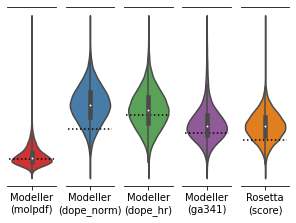

4beu


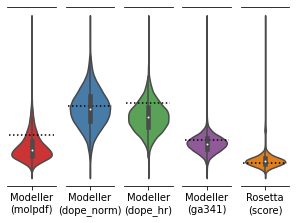

4unu


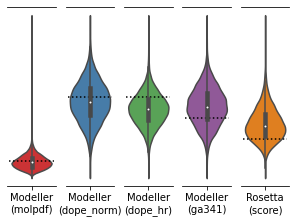

4z8j


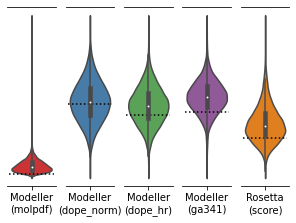

5vid


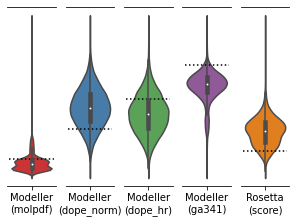

5vli


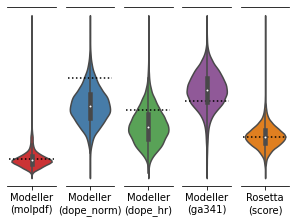

5vmr


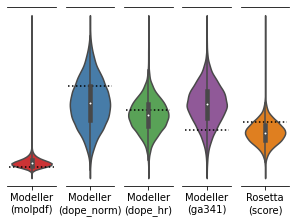

In [54]:
cmap = plt.get_cmap("Set1")

columns = df["column"].unique()

for pdb_id in PDB_IDS:
    print(pdb_id)

    fig, axs = plt.subplots(ncols=len(columns), figsize=(4, 3))

    df = process_scores(SCORES[f"{pdb_id}_modeller"], SCORES[f"{pdb_id}_rosetta"])
    df_wt = process_scores(SCORES[f"{pdb_id}_modeller"], SCORES[f"{pdb_id}_rosetta"])

    for i, (column, ax) in enumerate(zip(columns, axs)):
        sns.violinplot(x="name", y="value", data=df[df["column"] == column], color=cmap(i), ax=ax)
        ax.hlines(
            df_wt[df_wt["column"] == column]["value"].values[0], *ax.get_xlim(), linestyle=":"
        )
#         ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")
        ax.set_xlabel(None)
        ref = df

    for ax in axs[1:]:
        ax.set_ylabel(None)

    for i, ax in enumerate(axs):
        ax.set_ylabel(None)
#         ax.set_ylabel("Score" if i == 0 else "")
        ax.set_yticks([])
        #     ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.grid(axis="y", linestyle=":")

    fig.subplots_adjust(top=0.98, bottom=0.15, left=0.01, right=0.99, hspace=0.1)

    fig.savefig(NOTEBOOK_PATH.joinpath(f"modeller-and-rosetta-score-distributions-{pdb_id}.pdf"))
    fig.savefig(NOTEBOOK_PATH.joinpath(f"modeller-and-rosetta-score-distributions-{pdb_id}.svg"))
    fig.savefig(NOTEBOOK_PATH.joinpath(f"modeller-and-rosetta-score-distributions-{pdb_id}.png"), dpi=300)
    
    plt.show()
#     break

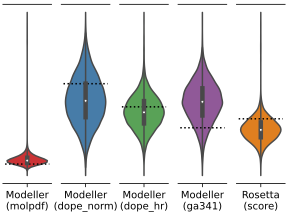

In [55]:
from IPython.display import SVG, Image

display(SVG("16_david_analysis/modeller-and-rosetta-score-distributions-5vmr.svg"))
# display(Image("07_protein_analysis_bestsel/reference-vs-design-secondary-structure-from-cd.png"))

1n5u


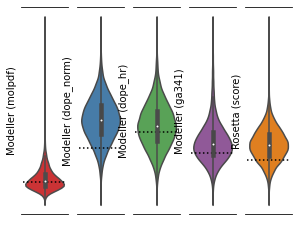

4beu


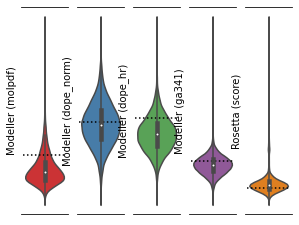

4unu


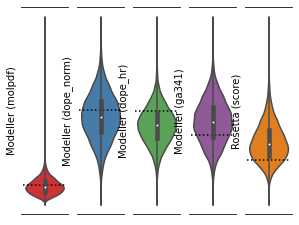

4z8j


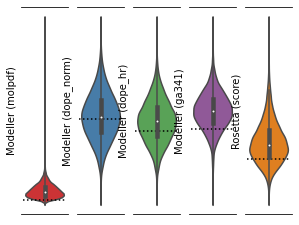

5vid


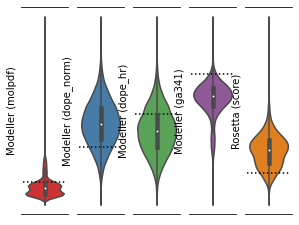

5vli


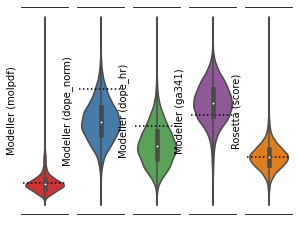

5vmr


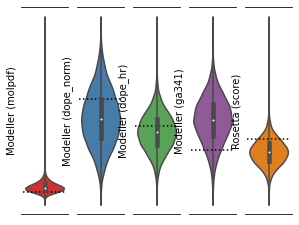

In [46]:
# cmap = plt.get_cmap("Set1")

# columns = df["column"].unique()

# for pdb_id in PDB_IDS:
#     print(pdb_id)

#     fig, axs = plt.subplots(ncols=len(columns), figsize=(4, 3))

#     df = process_scores(SCORES[f"{pdb_id}_modeller"], SCORES[f"{pdb_id}_rosetta"])
#     df_wt = process_scores(SCORES[f"{pdb_id}_modeller"], SCORES[f"{pdb_id}_rosetta"])

#     for i, (column, ax) in enumerate(zip(columns, axs)):
#         sns.violinplot(x="name", y="value", data=df[df["column"] == column], color=cmap(i), ax=ax)
#         ax.hlines(
#             df_wt[df_wt["column"] == column]["value"].values[0], *ax.get_xlim(), linestyle=":"
#         )
# #         ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")
#         ax.set_xlabel(None)
#         ax.set_xticks([])
#         ax.set_ylabel(df[df["column"] == column]["name"].values[0].replace("\n", " "))
#         ref = df

# #     for ax in axs[1:]:
# #         ax.set_ylabel(None)

#     for i, ax in enumerate(axs):
# #         ax.set_ylabel("Score" if i == 0 else "")
#         ax.set_yticks([])
#         #     ax.spines["top"].set_visible(False)
#         ax.spines["right"].set_visible(False)
#         ax.spines["left"].set_visible(False)
#         ax.grid(axis="y", linestyle=":")

#     fig.subplots_adjust(top=0.98, bottom=0.02, left=0.05, right=0.99, hspace=0.5)

#     fig.savefig(NOTEBOOK_PATH.joinpath(f"modeller-and-rosetta-score-distributions-{pdb_id}.pdf"))
#     fig.savefig(NOTEBOOK_PATH.joinpath(f"modeller-and-rosetta-score-distributions-{pdb_id}.svg"))
#     fig.savefig(NOTEBOOK_PATH.joinpath(f"modeller-and-rosetta-score-distributions-{pdb_id}.png"), dpi=300)
    
#     plt.show()
# #     break

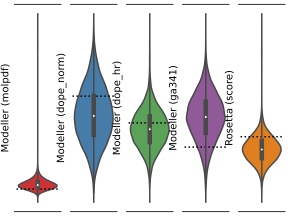

In [48]:
from IPython.display import SVG, Image

display(SVG("16_david_analysis/modeller-and-rosetta-score-distributions-5vmr.svg"))
# display(Image("07_protein_analysis_bestsel/reference-vs-design-secondary-structure-from-cd.png"))

In [121]:
len("Modeller")

8

(-4.0, 6.0)

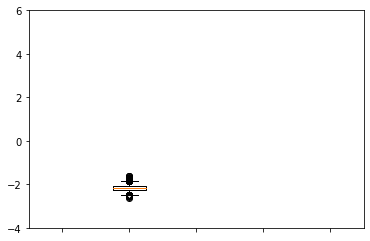

In [82]:
fg, ax = plt.subplots()

ax.boxplot([df[df["name"] == name]["value"] for name in df["name"].unique()])

ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")
ax.set_ylim(-4, 6)

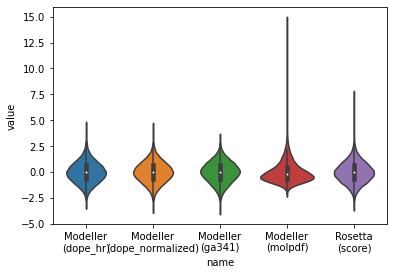

In [60]:
sns.violinplot(x="name", y="value", data=df)

In [27]:
Modeller (molpdf), Modeller (dope_normalized), Modeller (dope_hr), Modeller (ga341),  Rosetta (score)

NameError: name 'Modeller' is not defined

In [ ]:
!head {NOTEBOOK_PATH}/Scores/1n5u/scoresTotal_rosetta.sc

In [ ]:
df = pd.read_csv(NOTEBOOK_PATH.joinpath("Scores", "1n5u", "scoresTotal_rosetta.sc"), skiprows=1, sep=" +", engine="python")

In [ ]:
df.head()

In [ ]:
import seaborn as sns

In [ ]:
molpdf, dope_normalized, dope_hr and ga341, rosetta energy units

In [ ]:
cmap = plt.cm.get_cmap("Set1")

In [ ]:
for pdb_id, *xlim in [
    #
    ("1n5u", 250, 490),
    ("4beu", 850, 1350),
    ("4unu", 450, 950),
    ("4z8j", 250, 850),
    #     ("5vid", 250, 1450),
    #     ("5vli", 250, 1450),
    #     ("5vmr", 250, 1450),
]:
    with plt.rc_context(rc={"font.size": 18}):
        fg, ax = plt.subplots(figsize=(8 * 0.9, 6 * 0.9))
        ax.hist(np.clip(SCORES[f"{pdb_id}"]["molpdf"].values, *xlim), bins=80, range=xlim, color=cmap(8))
        ylim = ax.get_ylim()
        ax.vlines(SCORES[f"{pdb_id}_wt"].iloc[0]["molpdf"], *ylim, colors="k", linestyle="--", color=cmap(0))
        ax.set_ylim(ylim)
        ax.set_xlim(xlim)
        ax.set_xlabel("MolPDF score")
        ax.set_ylabel("Number of sequences")
    fg.tight_layout()
    fg.savefig(NOTEBOOK_PATH.joinpath(f"molpdb-scores-{pdb_id}.svg"), bbox_inches="tight")